# 8.1.2: The Perceptron algorithm


In [4]:
# import the necessary packages
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron
from sklearn import datasets
import numpy

import pandas
from keras.models import Sequential

from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline



In [ ]:
# load the MNIST dataset and split it into training and testing data
mnist = datasets.load_digits()
(trainData, testData, trainLabels, testLabels) = train_test_split(mnist.data, mnist.target,
    test_size=0.25, random_state=42)


# train the Perceptron
print("[INFO] training...")
model = Perceptron(n_iter=30, eta0=1.0, random_state=84)
model.fit(trainData, trainLabels)
 
# # evaluate the Perceptron
# print("[INFO] evaluating...")
# predictions = model.predict(testData)
# # print(classification_report(predictions, testLabels, target_names=mnist.target_names))


# # keras perceptron (input laters without activation function)
# sgd = SGD(lr=0.01)
# model = Sequential()
# model.add(Dense(128, input_dim=64, init='uniform'))#, activation='relu'))
# model.add(Dense(output_dim=10, init='uniform', activation='sigmoid'))
# # model.add(Dense(10, init='uniform', activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
# %timeit model.fit(trainData, to_categorical(trainLabels), nb_epoch=100, verbose=0)


In [10]:
print(classification_report(predictions, testLabels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.81      0.97      0.88        31
          2       1.00      0.86      0.93        44
          3       0.96      0.98      0.97        45
          4       0.98      0.89      0.93        61
          5       0.98      0.92      0.95        63
          6       0.98      0.94      0.96        47
          7       0.98      1.00      0.99        40
          8       0.82      1.00      0.90        31
          9       0.92      0.98      0.95        45

avg / total       0.95      0.95      0.95       450



In [ ]:
import keras
import numpy
from keras.models import Sequential
from keras.layers import Dense

In [18]:
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD, Adam


sgd = SGD(lr=0.01)
model = Sequential()
model.add(Dense(64, input_dim=64, init='uniform'))#, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(output_dim=10, init='uniform', activation='sigmoid'))
# model.add(Dense(10, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.fit(trainData, to_categorical(trainLabels), nb_epoch=50, verbose=0)


y_pred  = model.predict_classes(testData)

print (classification_report(testLabels, y_pred))

 32/450 [=>............................] - ETA: 0s             precision    recall  f1-score   support

          0       0.98      0.95      0.96        43
          1       0.95      0.95      0.95        37
          2       0.95      1.00      0.97        38
          3       0.96      0.96      0.96        46
          4       0.98      1.00      0.99        55
          5       0.93      0.97      0.95        59
          6       0.98      0.98      0.98        45
          7       0.98      0.98      0.98        41
          8       0.97      0.92      0.95        38
          9       0.96      0.92      0.94        48

avg / total       0.96      0.96      0.96       450



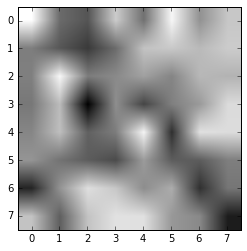

In [104]:
l1 = model.layers[0]
%matplotlib inline

import matplotlib.pyplot as plt
ax = plt.imshow(l1.get_weights()[0][10].reshape((8,8)), cmap='gray')

In [103]:
l1.get_weights()

[array([[ 0.03941441, -0.0193731 , -0.0423428 , ...,  0.00779356,
         -0.04958741, -0.04372184],
        [ 0.0326271 ,  0.03060799, -0.05742295, ..., -0.09167427,
         -0.08156422,  0.02155643],
        [-0.00589655, -0.10323024, -0.01459459, ..., -0.09137046,
         -0.02883442, -0.05665933],
        ..., 
        [-0.04400662,  0.05561505, -0.04991123, ..., -0.03702182,
         -0.02510803,  0.03321921],
        [ 0.08105172,  0.13333137, -0.10230482, ..., -0.01965322,
          0.06143871,  0.03536213],
        [-0.08306888,  0.12577547, -0.13291527, ..., -0.04961139,
          0.07543384,  0.08875389]], dtype=float32),
 array([ 0.10291101,  0.18817736,  0.11205198, -0.00461286,  0.16871929,
        -0.071969  ,  0.16661566,  0.08668966,  0.17586425, -0.20654121,
         0.02302185, -0.14742365,  0.0444041 , -0.15152986, -0.15133023,
        -0.14141488, -0.15845081, -0.07699904,  0.00685827, -0.03324314,
         0.19006228,  0.18303473,  0.18030709, -0.14212984,  0.04

In [12]:
from theano import config

In [17]:
str(config.gpu)

'<theano.configparser.SubObj object at 0x7fe4659be1d0>'

In [1]:
# %load /home/i008/mnist_keras.py
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))



Using Theano backend.


X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [2]:
%%timeit

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
82s - loss: 0.3946 - acc: 0.8798 - val_loss: 0.0996 - val_acc: 0.9685
Epoch 2/12
82s - loss: 0.1478 - acc: 0.9565 - val_loss: 0.0659 - val_acc: 0.9790
Epoch 3/12
81s - loss: 0.1120 - acc: 0.9666 - val_loss: 0.0522 - val_acc: 0.9831
Epoch 4/12
81s - loss: 0.0940 - acc: 0.9722 - val_loss: 0.0461 - val_acc: 0.9844
Epoch 5/12
91s - loss: 0.0810 - acc: 0.9763 - val_loss: 0.0415 - val_acc: 0.9861
Epoch 6/12
87s - loss: 0.0717 - acc: 0.9784 - val_loss: 0.0412 - val_acc: 0.9861
Epoch 7/12
81s - loss: 0.0661 - acc: 0.9809 - val_loss: 0.0354 - val_acc: 0.9878
Epoch 8/12


KeyboardInterrupt: 

In [19]:
np.array([1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9]).reshape(2, 3, 3)

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])